# Loading

In [ ]:
!pip install scanpy
!pip install matplotlib
!pip install mofapy2
!pip install matplotlib
import matplotlib
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
import palettable
import seaborn as sns
import matplotlib
import matplotlib.font_manager as fm

In [ ]:
import h5py
import pandas as pd
import numpy as np
import anndata

In [ ]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [ ]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

# MOFA Cardiomyocyte

In [ ]:
# 读取MOFA配对数据
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad')
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

In [ ]:
scEnhancer.obs = scATAC_seq.obs
scPromoter.obs = scATAC_seq.obs

In [ ]:
# 读取MOFA配对数据
scRNA_seq_Card = scRNA_seq[scRNA_seq.obs['CellTypes']=='Cardiomyocyte']
scATAC_seq_Card = scATAC_seq[scATAC_seq.obs['CellTypes']=='Cardiomyocyte']
scEnhancer_Card = scEnhancer[scEnhancer.obs['CellTypes']=='Cardiomyocyte']
scPromoter_Card = scPromoter[scPromoter.obs['CellTypes']=='Cardiomyocyte']

In [ ]:
scRNA_seq_Card.obs['regenerate']=''
scRNA_seq_Card.obs.loc[scRNA_seq_Card.obs['Type']=='P1+3 dpi','regenerate']='pos'
scRNA_seq_Card.obs.loc[scRNA_seq_Card.obs['Type']!='P1+3 dpi','regenerate']='neg'

In [ ]:
scRNA_seq_Card.obs

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType,regenerate
P1_3MI_AAAGCAAAGGTGATTA-1,pos,MI,3days,P1+3 dpi,3413,3413,11852.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_17,Cardiomyocyte,pos
P1_3MI_AACACGTTCCGAAGAG-1,pos,MI,3days,P1+3 dpi,1343,1342,2633.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_45,Cardiomyocyte,pos
P1_3MI_AACGTTGCAAGAGTCG-1,pos,MI,3days,P1+3 dpi,3172,3171,10260.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_63,Cardiomyocyte,pos
P1_3MI_AACTCAGAGGCTATCT-1,pos,MI,3days,P1+3 dpi,423,423,551.0,0.0,0.0,21,scRNA-seq,Cardiomyocyte-2,Cardiomyocyte,tr,cell_70,Cardiomyocyte,pos
P1_3MI_AACTCAGGTGACGGTA-1,pos,MI,3days,P1+3 dpi,317,317,420.0,0.0,0.0,21,scRNA-seq,Cardiomyocyte-2,Cardiomyocyte,tr,cell_73,Cardiomyocyte,pos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P8_3Sham_TTGACTTCATCATCCC-1,neg,Sham,3days,P8+3 dps,679,679,1262.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_9179,Cardiomyocyte,neg
P8_3Sham_TTGCCGTCAGACGCCT-1,neg,Sham,3days,P8+3 dps,1162,1162,2154.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_9181,Cardiomyocyte,neg
P8_3Sham_TTGTAGGGTGTTCTTT-1,neg,Sham,3days,P8+3 dps,876,876,1449.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_9193,Cardiomyocyte,neg
P8_3Sham_TTTACTGCAGCTTAAC-1,neg,Sham,3days,P8+3 dps,774,773,1257.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_9195,Cardiomyocyte,neg


In [ ]:
scATAC_seq_Card.obs=scRNA_seq_Card.obs
scEnhancer_Card.obs=scRNA_seq_Card.obs
scPromoter_Card.obs=scRNA_seq_Card.obs

In [ ]:
!pip install scanpy
!pip install mofapy2
from mofapy2.run.entry_point import entry_point
import anndata
import networkx as nx
import scanpy as sc
#import scglue
from matplotlib import rcParams
import pandas as pd
import numpy as np

  Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [ ]:
!pip install matplotlib==3.5
!pip install scglue
!pip install scanpy
import matplotlib
import scanpy

In [ ]:
rna_MOFA = scRNA_seq_Card
Enhancer_MOFA = scEnhancer_Card
Promoter_MOFA = scPromoter_Card

In [ ]:
rna_MOFA_meta=rna_MOFA.obs.copy()
rna_MOFA_meta['CellTypes']=[i.split('-')[0] for i in rna_MOFA_meta['CellTypes']]
rna_MOFA_meta.set_index(Promoter_MOFA.obs.index,inplace=True)
rna_MOFA_meta.index.name='sample'
rna_MOFA_meta.to_csv('rna_MOFA_Card.csv')
rna_MOFA_meta.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,domain,leiden_anno,CellTypes,delli,sample,CellType,regenerate
sample,,,,,,,,,,,,,,,,,
P1_3MI_AAAGCAAAGGTGATTA-1,pos,MI,3days,P1+3 dpi,3413,3413,11852.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_17,Cardiomyocyte,pos
P1_3MI_AACACGTTCCGAAGAG-1,pos,MI,3days,P1+3 dpi,1343,1342,2633.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_45,Cardiomyocyte,pos
P1_3MI_AACGTTGCAAGAGTCG-1,pos,MI,3days,P1+3 dpi,3172,3171,10260.0,0.0,0.0,4,scRNA-seq,Cardiomyocyte,Cardiomyocyte,tr,cell_63,Cardiomyocyte,pos
P1_3MI_AACTCAGAGGCTATCT-1,pos,MI,3days,P1+3 dpi,423,423,551.0,0.0,0.0,21,scRNA-seq,Cardiomyocyte-2,Cardiomyocyte,tr,cell_70,Cardiomyocyte,pos
P1_3MI_AACTCAGGTGACGGTA-1,pos,MI,3days,P1+3 dpi,317,317,420.0,0.0,0.0,21,scRNA-seq,Cardiomyocyte-2,Cardiomyocyte,tr,cell_73,Cardiomyocyte,pos


In [ ]:
# initialise the entry point
# MOFA参数设置
ent1 = entry_point()
ent1.set_data_options(
    scale_groups = False, 
    scale_views = False,
    center_groups=True,
)
# 构建组学层
data_mat=[[None for g in range(1)] for m in range(3)]
data_mat[0][0]=np.array(rna_MOFA.X.todense())
data_mat[1][0]=np.array(Enhancer_MOFA.X.todense())
data_mat[2][0]=np.array(Promoter_MOFA.X.todense())
# MOFA-Enhancer,Gene_Activity_ASC数据预处理，防止feature_names重复

Enhancer_MOFA_pos=[]
for i in scEnhancer_Card.var_names:
  Enhancer_MOFA_pos.append('Enhancer'+i)
Enhancer_MOFA_pos

Promoter_MOFA_pos=[]
for i in scPromoter_Card.var_names:
  Promoter_MOFA_pos.append('Promoter'+i)
Promoter_MOFA_pos

# MOFA数据导入
ent1.set_data_matrix(data_mat, likelihoods = ["gaussian","gaussian","gaussian"],
          views_names=['RNA','Enhancer','Promoter'],
          samples_names=[Promoter_MOFA.obs.index],
          features_names=[rna_MOFA.var_names,
                  Enhancer_MOFA_pos,
                  Promoter_MOFA_pos])
# 模型参数设置
ent1.set_model_options(
    factors = 20, 
    spikeslab_weights = True, 
    ard_factors = True,
    ard_weights = True
)
ent1.set_train_options(
    iter = 1000, 
    convergence_mode = "fast", 
    startELBO = 1, 
    freqELBO = 1, 
    dropR2 = 0.001, 
    gpu_mode = True, 
    verbose = False, 
    seed = 1
)
# 模型运行并保存
ent1.build()

ent1.run()

# Save the output
ent1.save(outfile='MOFA_Card.hdf5')
!cp MOFA_Card.hdf5 /content/drive/MyDrive/MI


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Groups names not provided, using default naming convention:
- group1, group2, ..., groupG

Successfully loaded view='RNA' group='group0' with N=827 samples and D=3000 features...
Successfully loaded view='Enhancer' group='group0' with N=827 samples and D=3451 features...
Successfully loaded view='Promoter' group='group0' with N=827 samples and D=3963 features...



Model options

# Cardiomyocyte Process

In [77]:
# 读取MOFA配对数据
scRNA_seq = anndata.read_h5ad("/content/drive/MyDrive/MI/scRNA_seq_MOFA_normalized.h5ad")
scATAC_seq = anndata.read_h5ad('/content/drive/MyDrive/MI/scATAC_seq_MOFA_normalized.h5ad')
scEnhancer = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Enhancer_normalized.h5ad")
scPromoter = anndata.read_h5ad("/content/drive/MyDrive/MI/scATAC_seq_Promoter_normalized.h5ad")

In [78]:
scEnhancer.obs = scATAC_seq.obs
scPromoter.obs = scATAC_seq.obs

In [79]:
# 读取MOFA配对数据
scRNA_seq_Card = scRNA_seq[scRNA_seq.obs['CellTypes']=='Cardiomyocyte']
scATAC_seq_Card = scATAC_seq[scATAC_seq.obs['CellTypes']=='Cardiomyocyte']
scEnhancer_Card = scEnhancer[scEnhancer.obs['CellTypes']=='Cardiomyocyte']
scPromoter_Card = scPromoter[scPromoter.obs['CellTypes']=='Cardiomyocyte']

In [80]:
scRNA_seq_Card.obs['regenerate']=''
scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P1+3 dpi'].obs['regenerate']='pos'
scRNA_seq_Card[scRNA_seq_Card.obs['Type']!='P1+3 dpi'].obs['regenerate']='neg'

In [81]:
scATAC_seq_Card.obs=scRNA_seq_Card.obs
scEnhancer_Card.obs=scRNA_seq_Card.obs
scPromoter_Card.obs=scRNA_seq_Card.obs

In [82]:
!pip install matplotlib==3.1.3

  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.0
    Uninstalling matplotlib-3.5.0:
      Successfully uninstalled matplotlib-3.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


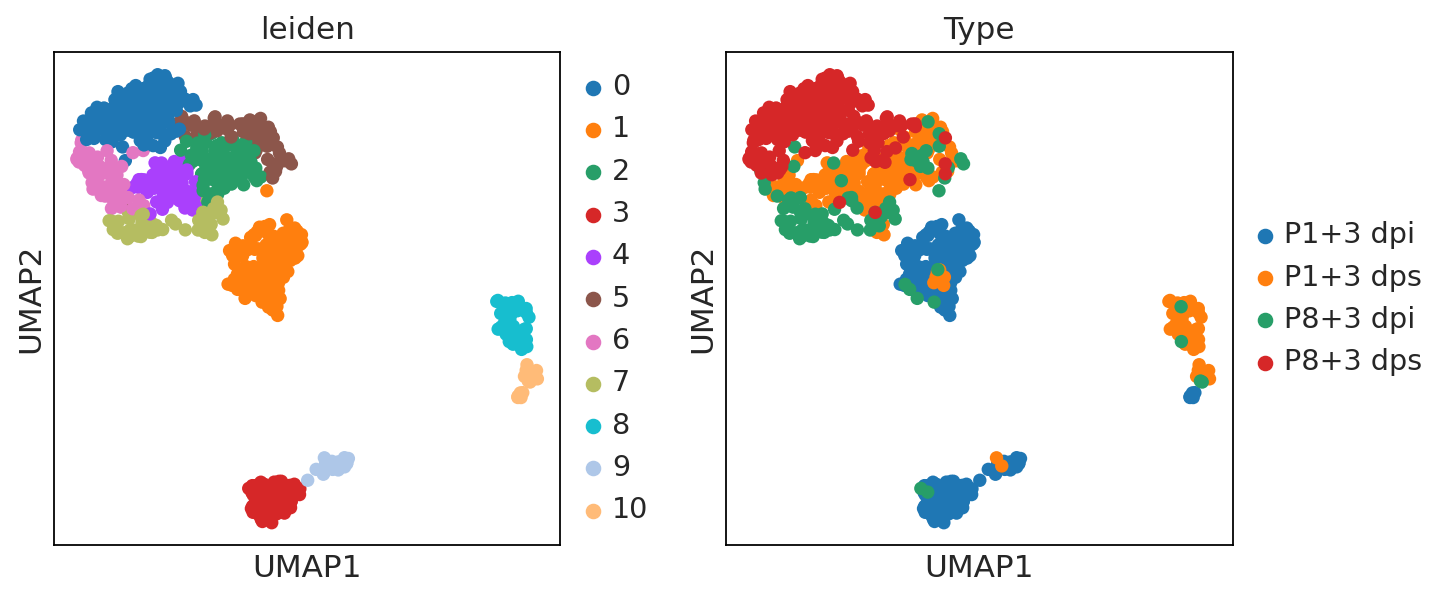

In [83]:
# 对Cardiomyocyte行二次聚类
!pip install leidenalg
sc.tl.pca(scRNA_seq_Card, svd_solver='arpack')
sc.pp.neighbors(scRNA_seq_Card, n_neighbors=10, n_pcs=40)
sc.tl.leiden(scRNA_seq_Card)
sc.tl.paga(scRNA_seq_Card)
sc.pl.paga(scRNA_seq_Card, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(scRNA_seq_Card, init_pos='paga')
sc.pl.umap(scRNA_seq_Card, color=['leiden','Type']) 

In [84]:
import h5py
import pandas as pd
import numpy as np

In [85]:
def normalization(data):
    _range = np.max(abs(data))
    return data / _range

In [86]:
def get_weights(f,view,factor,scale=True):
  view_names=f['views']['views'][:]
  group_names=f['groups']['groups'][:]
  feature_names=np.array([f['features'][i][:] for i in view_names])
  sample_names=np.array([f['samples'][i][:] for i in group_names])
  f_name=feature_names[np.where(view_names==str.encode(view))[0][0]]
  f_w=f['expectations']['W'][view][factor-1]
  if scale==True:
    f_w=normalization(f_w)
  res=pd.DataFrame()
  res['feature']=f_name
  res['weights']=f_w
  res['abs_weights']=abs(f_w)
  res['sig']='+'
  res.loc[(res.weights<0),'sig'] = '-'

  return res

In [87]:
f_all = h5py.File('/content/drive/MyDrive/MI/MOFA_Card.hdf5','r')   #打开h5文件
# 可以查看所有的主键
for key in f_all.keys():
    print(f_all[key].name)

/data
/expectations
/features
/groups
/intercepts
/model_options
/samples
/training_opts
/training_stats
/variance_explained
/views


In [88]:
for i in range(f_all['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_Card.obs['factor{0}'.format(i+1)]=f_all['expectations']['Z']['group0'][i]
for i in range(f_all['expectations']['Z']['group0'].shape[0]):
  scEnhancer_Card.obs['factor{0}'.format(i+1)]=f_all['expectations']['Z']['group0'][i]
for i in range(f_all['expectations']['Z']['group0'].shape[0]):
  scPromoter_Card.obs['factor{0}'.format(i+1)]=f_all['expectations']['Z']['group0'][i]

In [89]:
new_cluster_names = [
    'Cardiomyocyte-1','Cardiomyocyte-2','Cardiomyocyte-3','Cardiomyocyte-4','Cardiomyocyte-5','Cardiomyocyte-6','Cardiomyocyte-7','Cardiomyocyte-8','Cardiomyocyte-9','Cardiomyocyte-10','Cardiomyocyte-11']
scRNA_seq_Card.rename_categories('leiden', new_cluster_names)

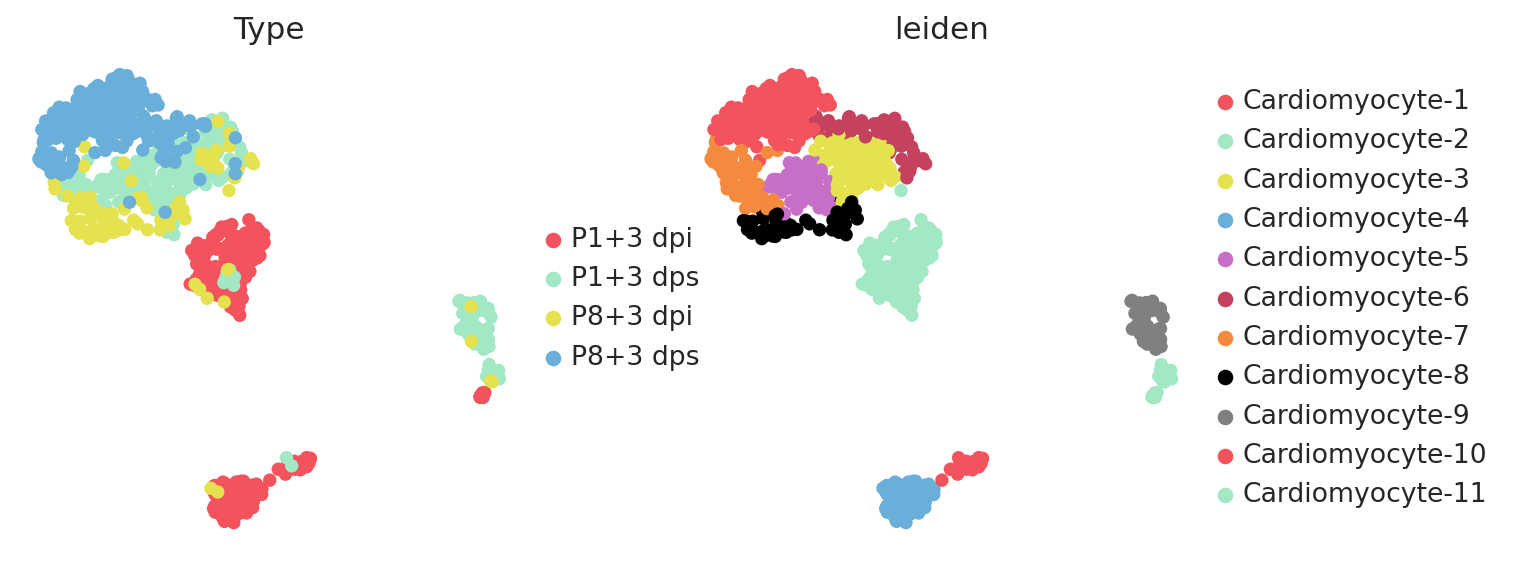

In [90]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_Card,
      color=['Type','leiden'], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,
      frameon=False, palette=scnmt,
      )

In [91]:
for i in range(f_all['expectations']['Z']['group0'].shape[0]):
  scRNA_seq_Card.obs['factor{0}'.format(i+1)]=f_all['expectations']['Z']['group0'][i]

In [92]:
variance=pd.read_csv('/content/drive/MyDrive/MI/Card/variance_explained_Card.csv')
corr=pd.read_csv('/content/drive/MyDrive/MI/Card/correlate_factors_Card.csv')
variance.index=corr.index
variance

,RNA,Enhancer,Promoter
Factor1,10.800268,0.035741,0.030440
Factor2,0.072015,1.255935,1.713355
Factor3,0.678376,1.196744,1.163724
Factor4,0.071924,1.083356,1.545933
Factor5,0.047225,1.066203,0.844355
Factor6,0.053859,0.761174,1.069127
Factor7,0.029915,1.029798,0.670472
Factor8,0.037055,0.496645,1.048766
Factor9,0.026607,0.632838,0.911652
Factor10,0.090371,0.381592,1.053142


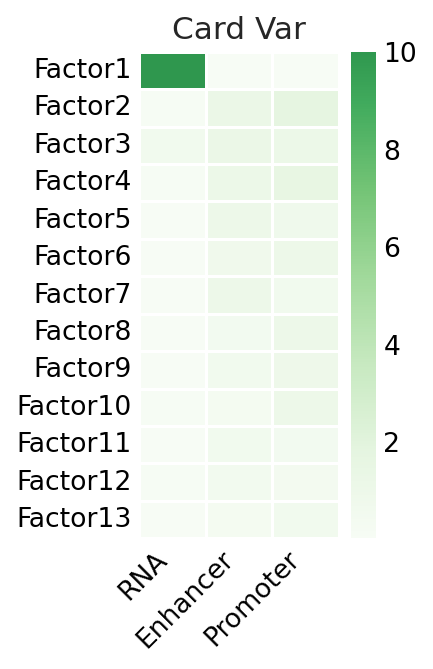

In [93]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_blues=sns.color_palette("Greens", 1000)[0:700]
g=sns.heatmap(variance,
      cmap=new_blues,vmax=10,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card Var')
plt.savefig("Card_var.png",dpi=300,bbox_inches = 'tight')

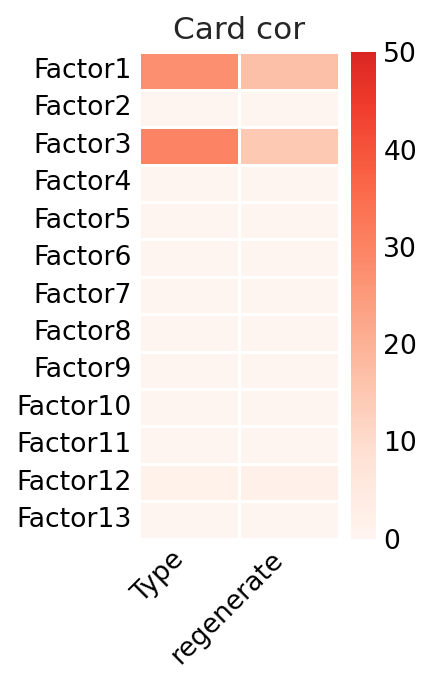

In [94]:
fig, ax = plt.subplots(figsize=(2,4))         # Sample figsize in inches
new_reds=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(corr,
      cmap=new_reds, vmax=50,
      linewidths=.5,annot_kws={"size": 12},ax=ax,
      )

g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card cor')
plt.savefig("Card_cor.png",dpi=300,bbox_inches = 'tight')

In [95]:
plot_data=scRNA_seq_Card.obs
plot_data.head()

,Stem_Cell_Property,Myocardial_infarction,Operation_time,Type,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,...,factor4,factor5,factor6,factor7,factor8,factor9,factor10,factor11,factor12,factor13
P1_3MI_AAAGCAAAGGTGATTA-1,pos,MI,3days,P1+3 dpi,3413,3413,11852.0,0.0,0.0,Cardiomyocyte-2,...,-0.063269,0.186471,-0.339725,0.568190,-0.004380,0.170127,0.077954,-0.089241,-0.032175,-0.186965
P1_3MI_AACACGTTCCGAAGAG-1,pos,MI,3days,P1+3 dpi,1343,1342,2633.0,0.0,0.0,Cardiomyocyte-2,...,-0.050197,-0.141236,-0.302617,-0.050519,-0.194237,-0.209656,-0.282839,-0.090463,0.088721,-0.061139
P1_3MI_AACGTTGCAAGAGTCG-1,pos,MI,3days,P1+3 dpi,3172,3171,10260.0,0.0,0.0,Cardiomyocyte-2,...,-0.077312,-0.080977,-0.239944,-0.035317,-0.123501,0.034379,-0.212042,-0.030272,0.127461,-0.183938
P1_3MI_AACTCAGAGGCTATCT-1,pos,MI,3days,P1+3 dpi,423,423,551.0,0.0,0.0,Cardiomyocyte-4,...,-0.064250,-0.114651,-0.132156,0.045278,-0.097453,0.009449,-0.106746,-0.056673,-0.047312,0.015711
P1_3MI_AACTCAGGTGACGGTA-1,pos,MI,3days,P1+3 dpi,317,317,420.0,0.0,0.0,Cardiomyocyte-4,...,-0.070953,-0.037744,-0.189982,0.003252,-0.115862,-0.098141,-0.231334,-0.046301,0.053905,-0.090237


In [96]:
from scipy.stats import ttest_1samp
from scipy import stats

In [97]:
cell_t=list(set(plot_data['leiden']))
cell_pd=pd.DataFrame(index=cell_t)

for i in [1,3]:
  test=[]
  for j in cell_t:
    a=plot_data[plot_data['leiden']==j]['factor'+str(i)].values
    b=plot_data[~(plot_data['leiden']==j)]['factor'+str(i)].values
    t, p = stats.ttest_ind(a,b)
    logp=-np.log(p)
    if(logp>500):
      logp=500
    test.append(logp)
  cell_pd['factor'+str(i)]=test
cell_pd

,factor1,factor3
Cardiomyocyte-9,188.478460,2.170193
Cardiomyocyte-5,14.111703,0.478853
Cardiomyocyte-11,90.080418,0.136864
Cardiomyocyte-10,73.043607,0.303558
Cardiomyocyte-2,8.480965,18.538739
Cardiomyocyte-6,6.634031,1.316059
Cardiomyocyte-8,13.803911,0.724950
Cardiomyocyte-7,10.906324,0.453917
Cardiomyocyte-1,25.041311,43.549520
Cardiomyocyte-3,18.459997,1.226721


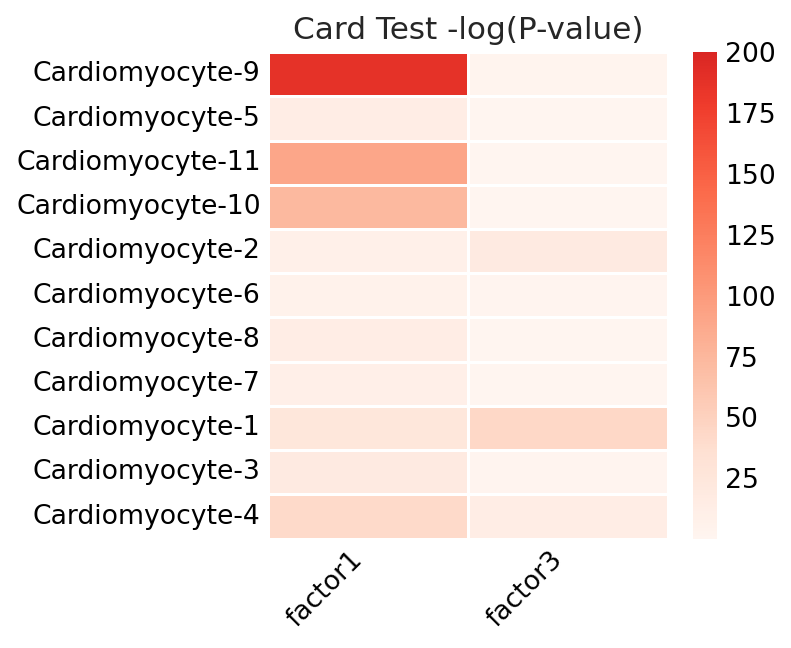

In [98]:
fig, ax = plt.subplots(figsize=(4,4))         # Sample figsize in inches
new_blues=sns.color_palette("Reds", 1000)[0:700]
g=sns.heatmap(cell_pd,
      cmap=new_blues,vmax=200,
      linewidths=.5,annot_kws={"size": 12},ax=ax
      )
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 12,rotation=45, horizontalalignment='right',)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 12,rotation=360)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=12)
plt.title('Card Test -log(P-value)')
plt.savefig("Card_cor_cell.png",dpi=300,bbox_inches = 'tight')

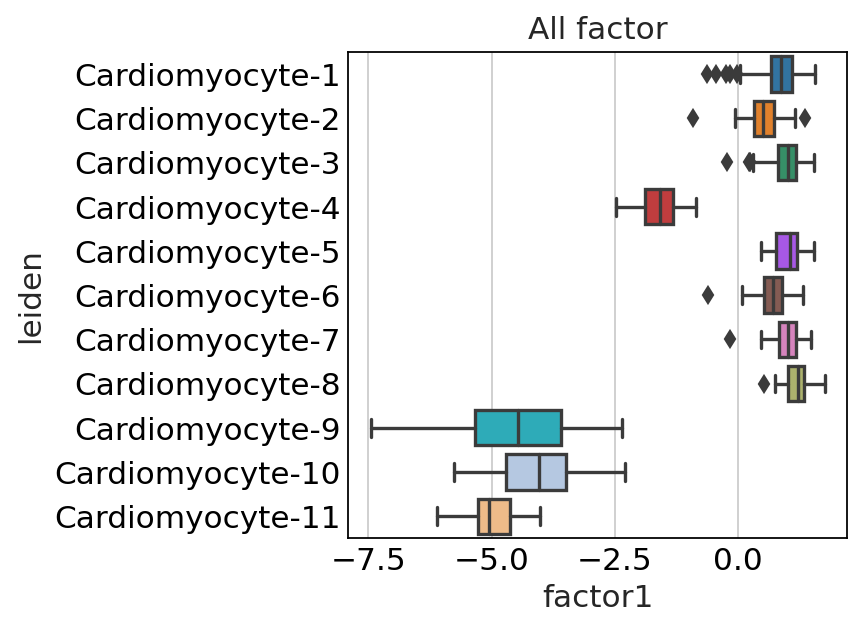

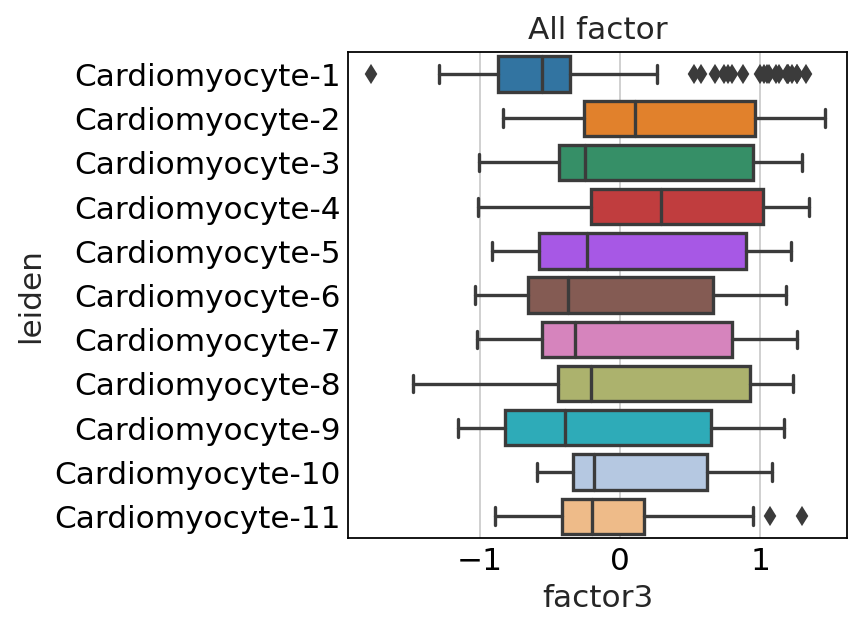

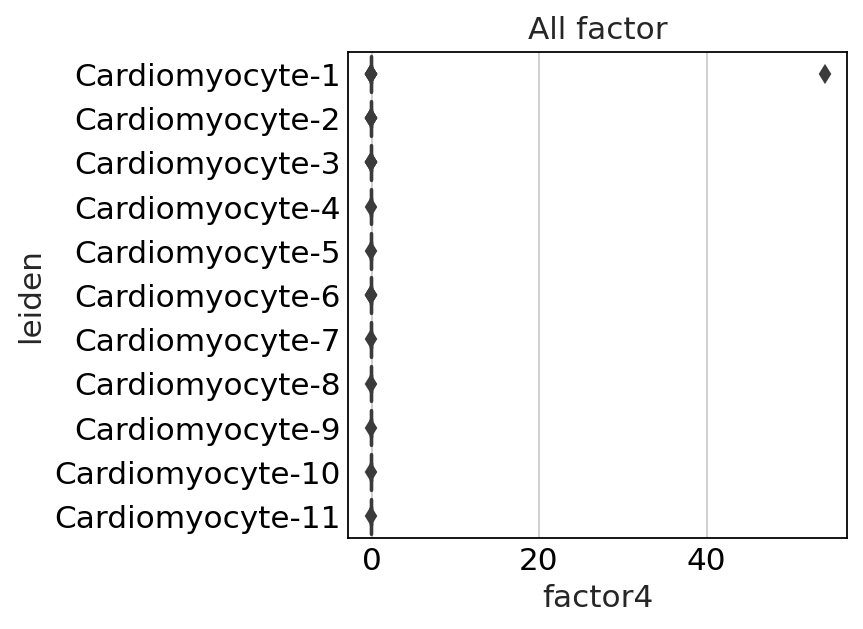

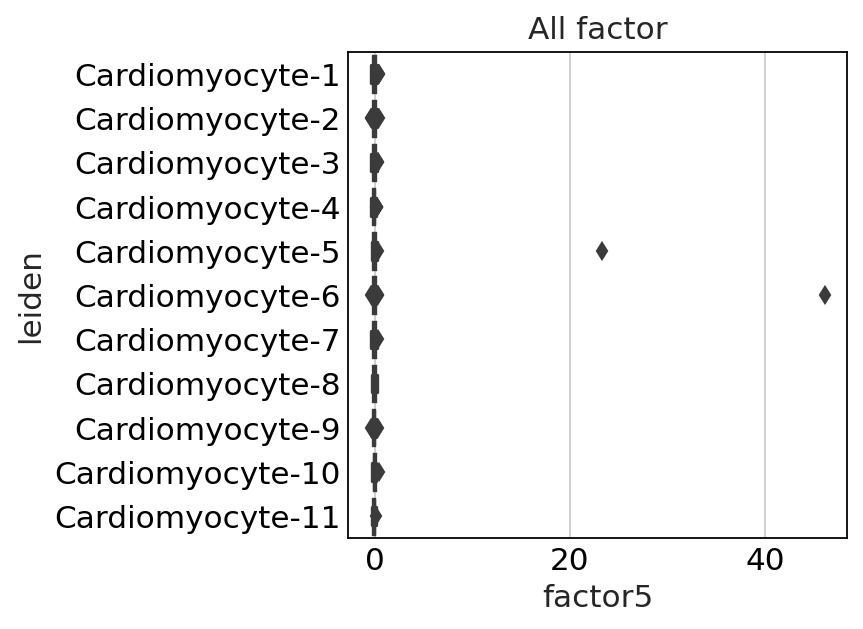

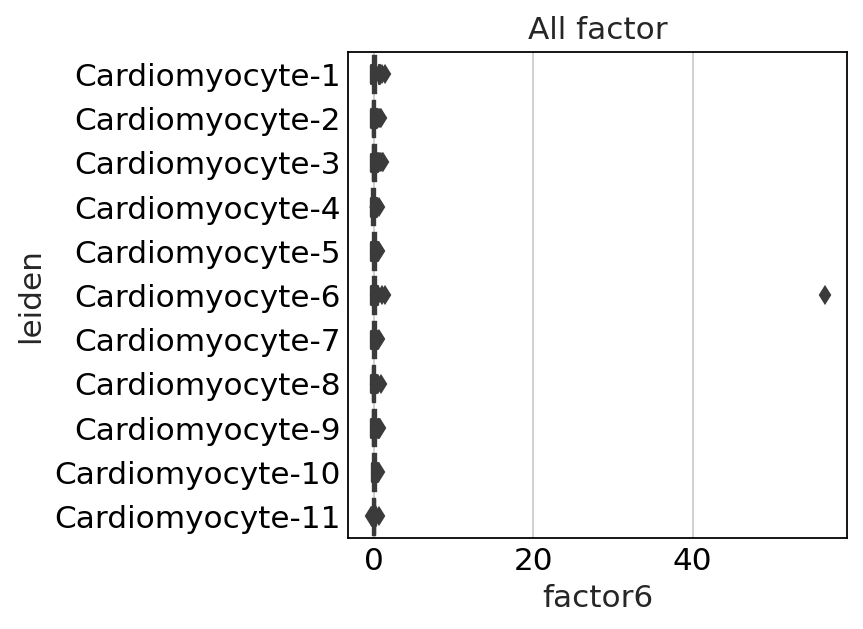

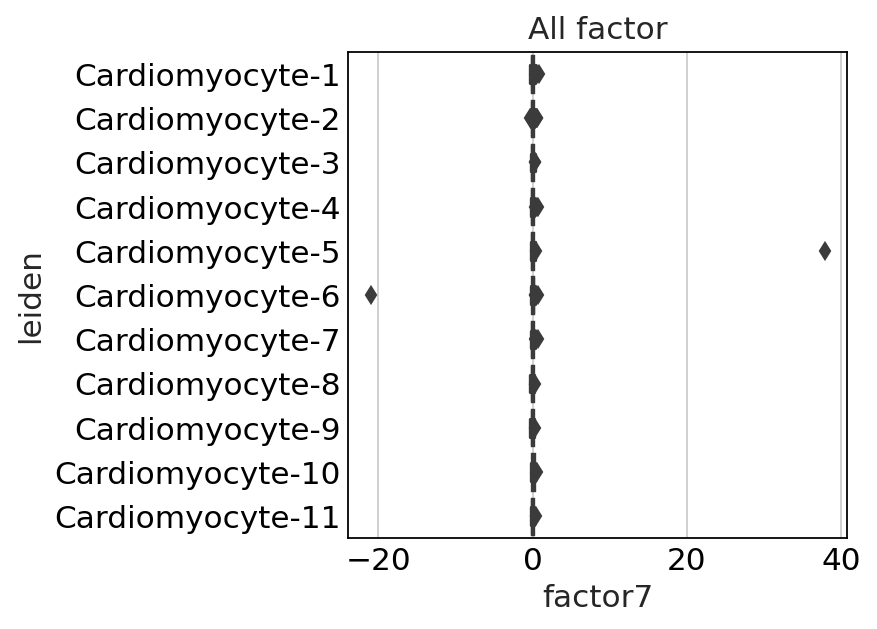

In [99]:
for i in [1,3,4,5,6,7]:
  sns.boxplot(y='leiden',x='factor'+str(i),data=scRNA_seq_Card.obs)
  plt.title('All factor')
  plt.savefig("all_factor{0}.png".format(str(i)),dpi=300,bbox_inches = 'tight')
  plt.show()

In [100]:
Card_factor_1=get_weights(f_all,'RNA',1)
xl=[]
for i in Card_factor_1['feature'].values:
  xl.append(bytes.decode(i).replace('Mutation',''))
Card_factor_1['feature']=xl
Card_factor_1=Card_factor_1.sort_values('weights',ascending=False)
Card_factor_1.head(10)

,feature,weights,abs_weights,sig
2017,Snap91,0.934893,0.934893,+
172,Rgs5,0.897148,0.897148,+
2579,Gga1,0.893255,0.893255,+
950,Igfbp7,0.825276,0.825276,+
729,Tpm2,0.804839,0.804839,+
1884,Olfr736,0.753451,0.753451,+
398,Myl9,0.747854,0.747854,+
985,Sparcl1,0.738942,0.738942,+
1113,Cald1,0.736925,0.736925,+
1421,RP23-32A8.5,0.671226,0.671226,+


In [101]:
def get_viodata(scRNA_seq_P1_dpi,scRNA_seq_P1_dps,scRNA_seq_P8_dpi,scRNA_seq_P8_dps,cell_type,genelist):
  vio_data=pd.DataFrame()
  for i in genelist:
    test_1=pd.DataFrame()
    test_1['value']=scRNA_seq_P1_dpi[scRNA_seq_P1_dpi.obs['CellTypes']==cell_type][:,i].X.T[0].A[0]
    test_1['gene']=[i for i in [i]*len(test_1)]
    test_1['type']=[i for i in ['P1 dpi']*len(test_1)]

    test_2=pd.DataFrame()
    test_2['value']=scRNA_seq_P1_dps[scRNA_seq_P1_dps.obs['CellTypes']==cell_type][:,i].X.T[0].A[0]
    test_2['gene']=[i for i in [i]*len(test_2)]
    test_2['type']=[i for i in ['P1 dps']*len(test_2)]
  

    test_3=pd.DataFrame()
    test_3['value']=scRNA_seq_P8_dpi[scRNA_seq_P8_dpi.obs['CellTypes']==cell_type][:,i].X.T[0].A[0]
    test_3['gene']=[i for i in [i]*len(test_3)]
    test_3['type']=[i for i in ['P8 dpi']*len(test_3)]

    test_4=pd.DataFrame()
    test_4['value']=scRNA_seq_P8_dps[scRNA_seq_P8_dps.obs['CellTypes']==cell_type][:,i].X.T[0].A[0]
    test_4['gene']=[i for i in [i]*len(test_4)]
    test_4['type']=[i for i in ['P8 dps']*len(test_4)]

    vio_data=pd.concat([vio_data,test_1],ignore_index=True)
    vio_data=pd.concat([vio_data,test_2],ignore_index=True)
    vio_data=pd.concat([vio_data,test_3],ignore_index=True)
    vio_data=pd.concat([vio_data,test_4],ignore_index=True)
  return vio_data

In [102]:
def pltx(x1,x2,y1,y2,sig,min_x=0):
    x=np.ones((2))*x1
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x=np.ones((2))*x2
    y = np.arange(y1,y2,y2-y1-0.0001)
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x = np.arange(x1,x2+0.0001,x2-x1)
    y = y2+0*x
    plt.plot(x,y,label="$y$",color="black",linewidth=1)
    x0 = (x1+x2)/2
    y0=y2
    plt.annotate(r'%s'%sig, xy=(x0, y0), xycoords='data', xytext=(0, +1),
                     textcoords='offset points', fontsize=15,color="black")
    if(min_x!=0):
        plt.ylim(min_x,y2+y2/10)

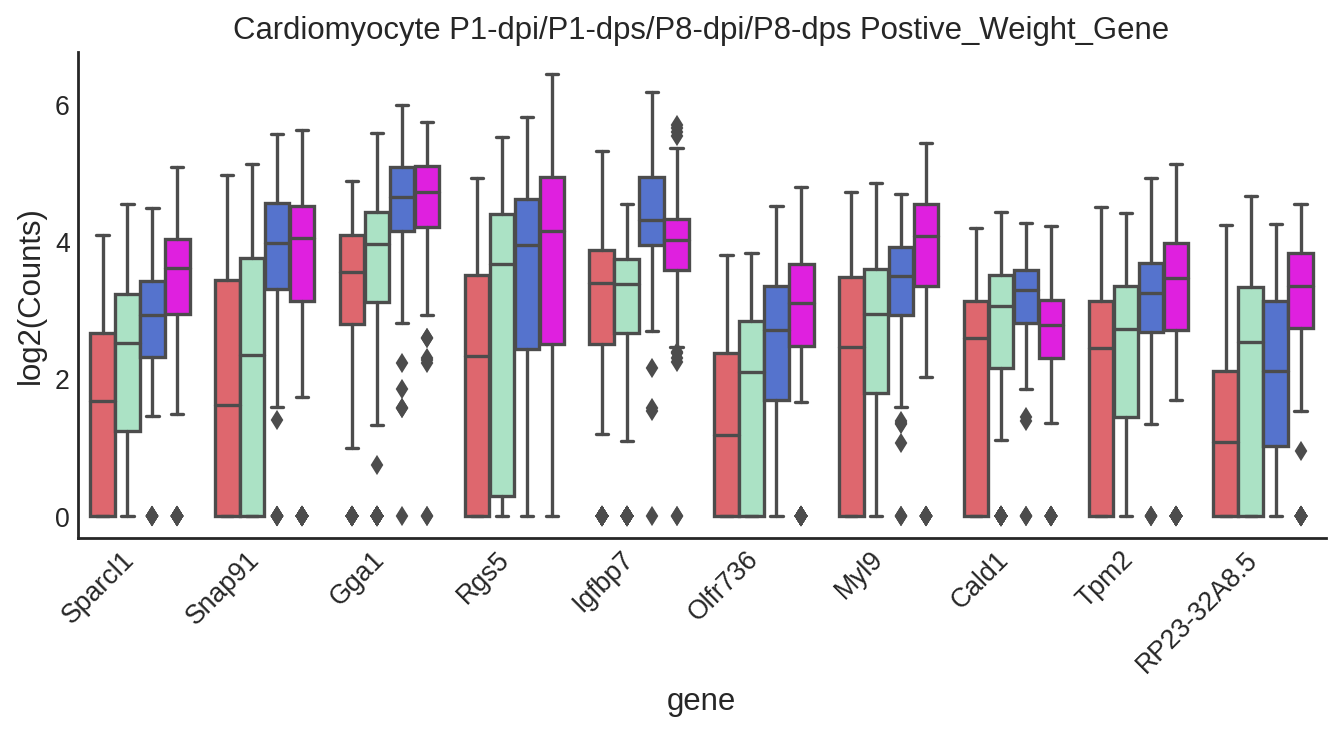

In [103]:
scRNA_seq_Card_P1_dpi = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P1+3 dpi']
scRNA_seq_Card_P1_dps = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P1+3 dps']
scRNA_seq_Card_P8_dpi = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P8+3 dpi'] 
scRNA_seq_Card_P8_dps = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P8+3 dps'] 

ret=list(set(Card_factor_1.loc[Card_factor_1['weights']>0.67,'feature']))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_Card_P1_dpi,scRNA_seq_Card_P1_dps,scRNA_seq_Card_P8_dpi,scRNA_seq_Card_P8_dps,'Cardiomyocyte',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4","#4169E1","#FF00FF"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

#sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
#        palette=["#f2535d","#a2ebc4"],ax=ax,
#        split=True, jitter=0.2, 
#        )


plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Cardiomyocyte P1-dpi/P1-dps/P8-dpi/P8-dps Postive_Weight_Gene')
plt.ylabel('log2(Counts)')
plt.savefig("Cardiomyocyte_Postive_Weight_Gene.png",dpi=300,bbox_inches = 'tight')

In [104]:
list(set(Card_factor_1.loc[Card_factor_1['weights']<-0.67,'feature'])) Sparcl1

['Ceacam14', 'Slit3', 'Actc1', 'Comt', 'Tnnt2', 'Myl2', 'Ttc5', 'Casp1']

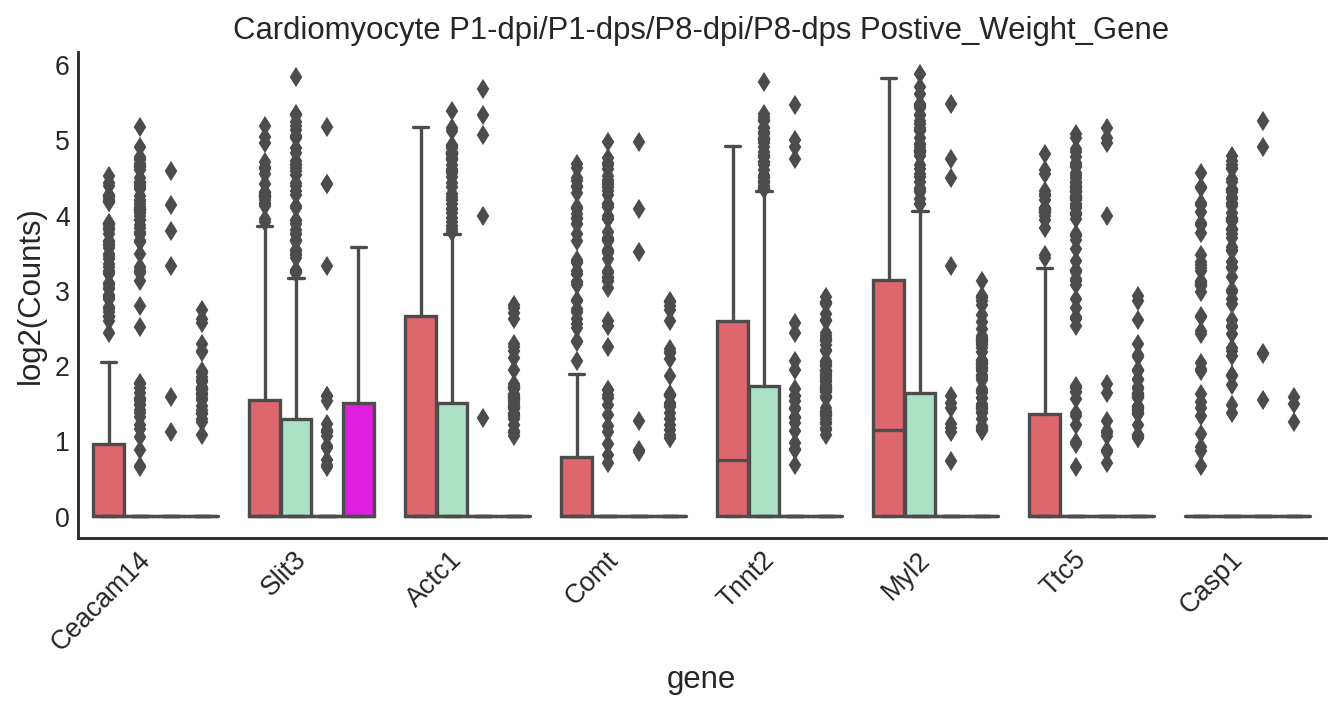

In [105]:
scRNA_seq_Card_P1_dpi = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P1+3 dpi']
scRNA_seq_Card_P1_dps = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P1+3 dps']
scRNA_seq_Card_P8_dpi = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P8+3 dpi'] 
scRNA_seq_Card_P8_dps = scRNA_seq_Card[scRNA_seq_Card.obs['Type']=='P8+3 dps'] 

ret=list(set(Card_factor_1.loc[Card_factor_1['weights']<-0.67,'feature']))
#ret=list(set(neg_f) & (set(pos_f))) 
plot_data1=get_viodata(scRNA_seq_Card_P1_dpi,scRNA_seq_Card_P1_dps,scRNA_seq_Card_P8_dpi,scRNA_seq_Card_P8_dps,'Cardiomyocyte',ret)
plot_data1
plt.style.use('seaborn-white')
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x="gene", y="value", hue='type',data=plot_data1, 
        palette=["#f2535d","#a2ebc4","#4169E1","#FF00FF"],ax=ax,
        #saturation=1
        )

for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col = artist.get_facecolor()
    artist.set_edgecolor(col)
    artist.set_facecolor('None')

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)
        line.set_linewidth(3)

# Also fix the legend
for legpatch in ax.get_legend().get_patches():
    col = legpatch.get_facecolor()
    legpatch.set_edgecolor(col)
    legpatch.set_facecolor('None')

#sns.stripplot(x="gene", y="value", hue='type',data=plot_data1, 
#        palette=["#f2535d","#a2ebc4"],ax=ax,
#        split=True, jitter=0.2, 
#        )


plt.legend([],[])
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 15,rotation=45, horizontalalignment='right',)

plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.title('Neg Test -log(P-value)')
plt.title('Cardiomyocyte P1-dpi/P1-dps/P8-dpi/P8-dps Postive_Weight_Gene')
plt.ylabel('log2(Counts)')
plt.savefig("Cardiomyocyte_Negative_Weight_Gene.png",dpi=300,bbox_inches = 'tight')

In [106]:
!pip install matplotlib==3.5
import matplotlib

  Using cached matplotlib-3.5.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


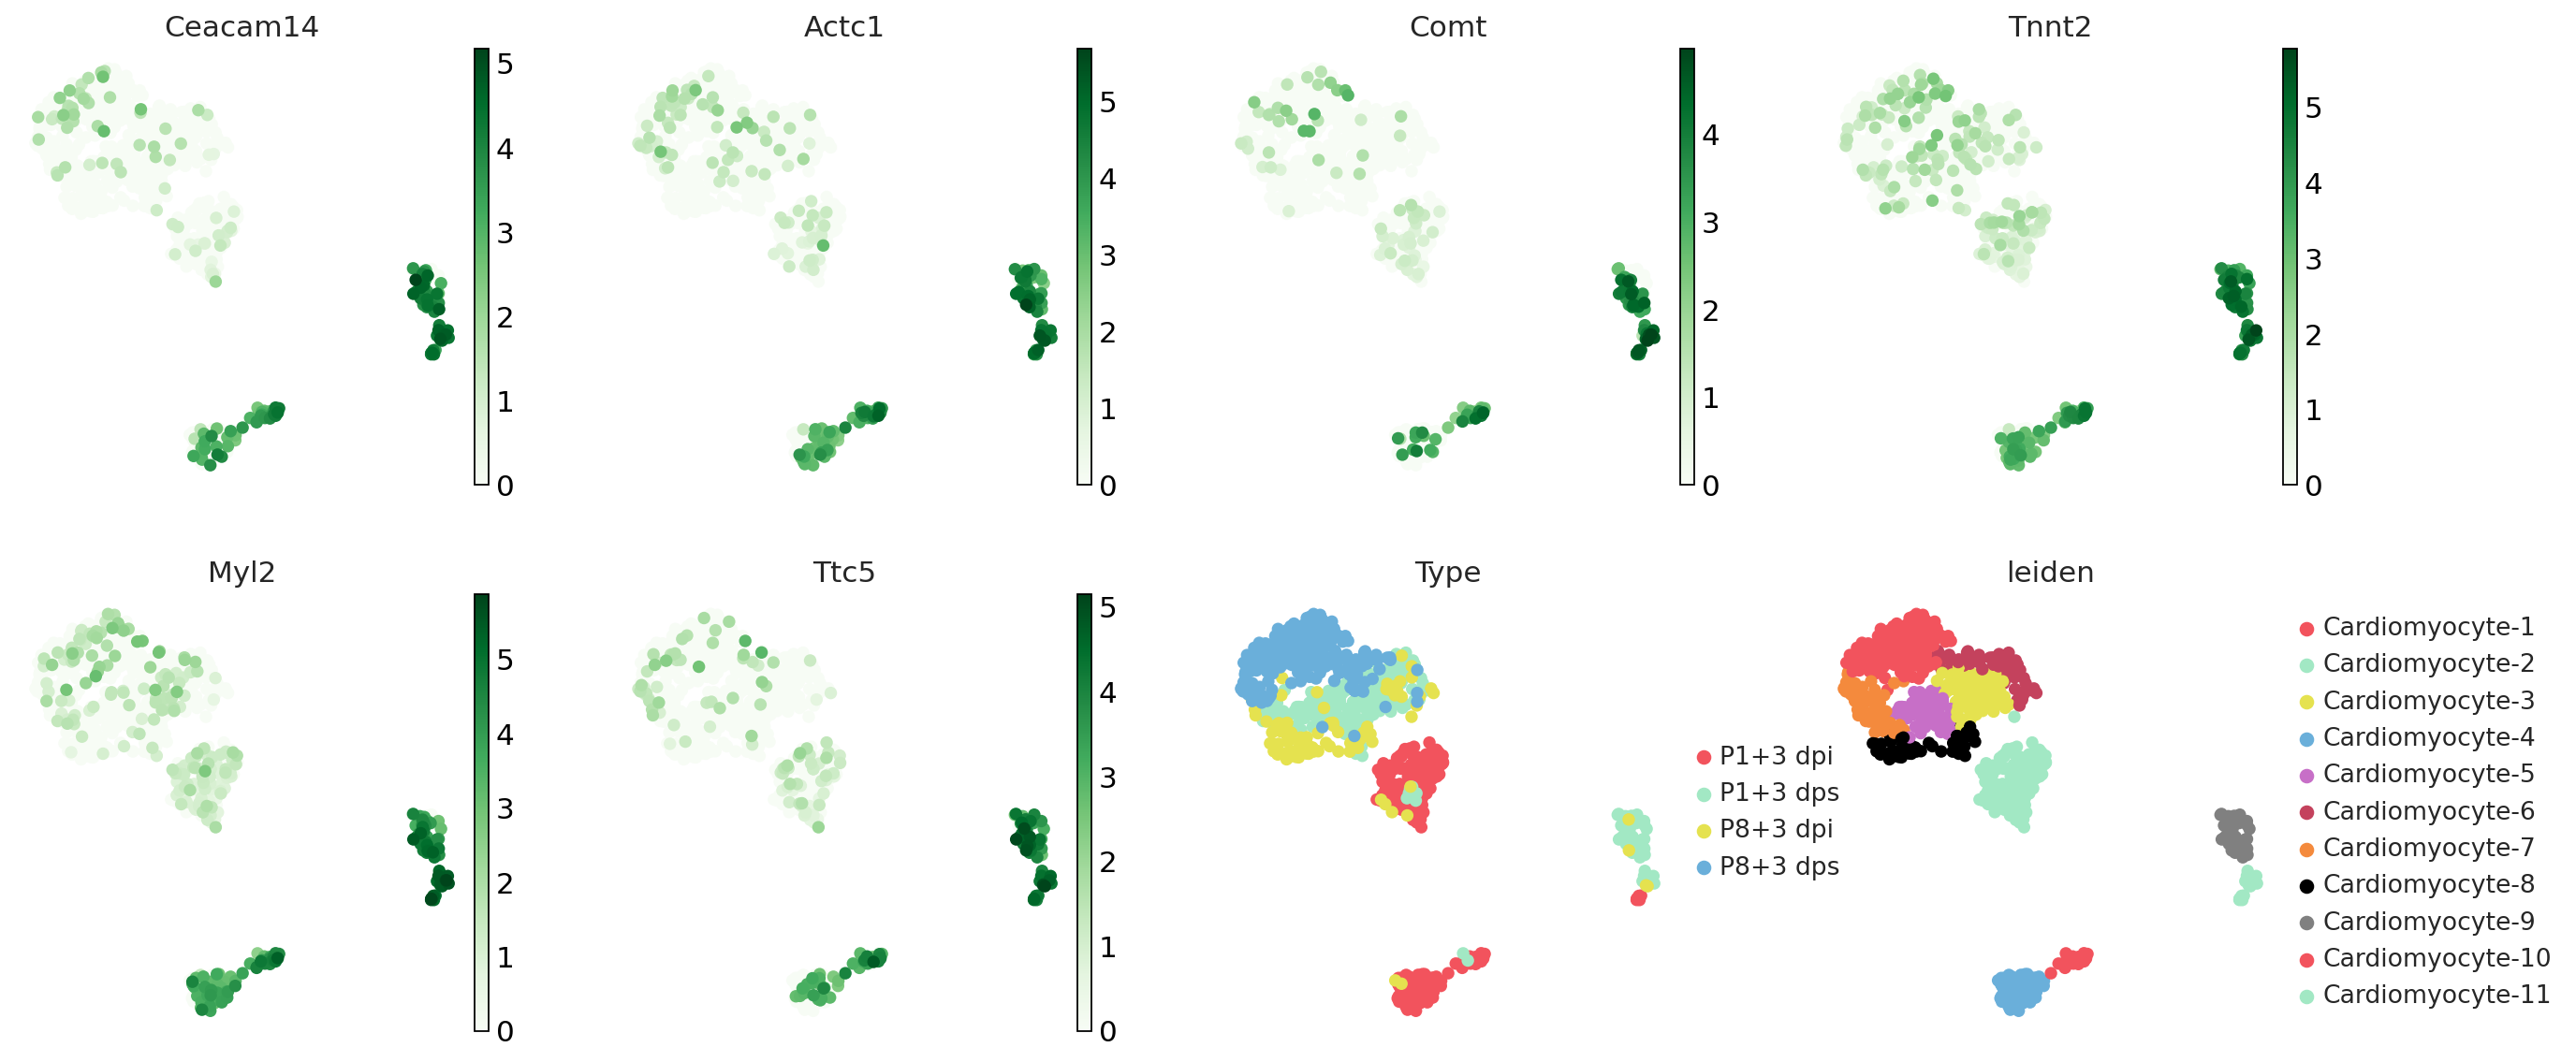

In [107]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_Card,
      color=['Ceacam14','Actc1','Comt','Tnnt2','Myl2','Ttc5','Type','leiden'], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,cmap='Greens',
      frameon=False, palette=scnmt,
      )

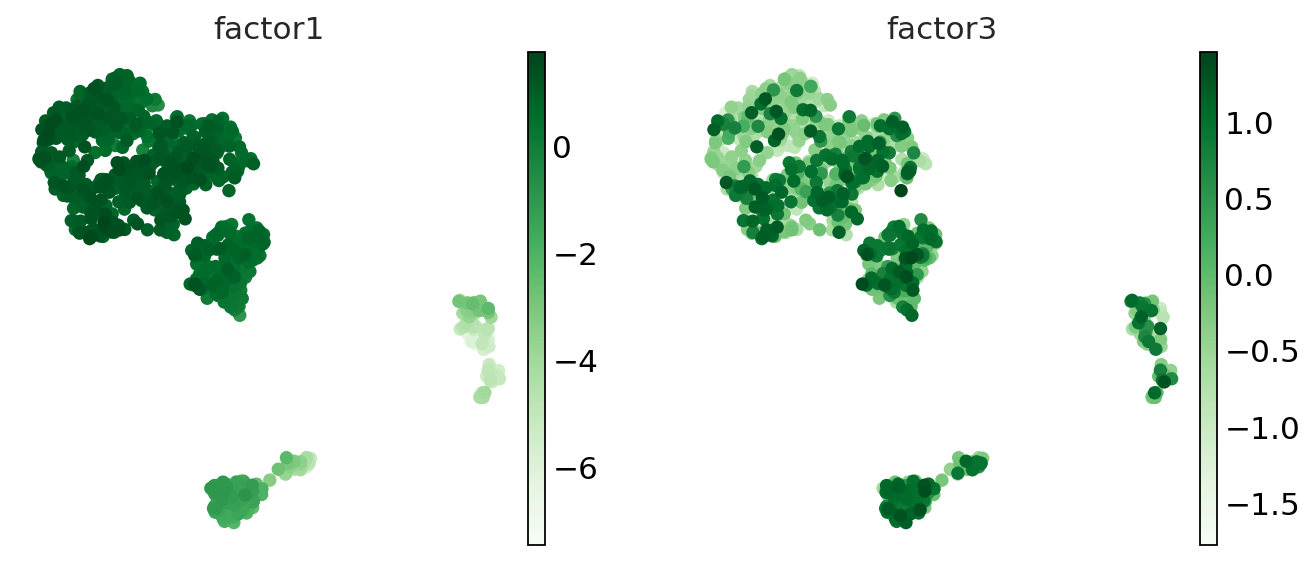

In [125]:
scnmt=['#f2535d','#a2e8c4','#e5e24f','#6aafda','#c76fc7','#c4425d','#f48a3d','black','grey']
sc.settings.set_figure_params(dpi=80,figsize=[4,4])
sc.pl.umap(scRNA_seq_Card,
      color=['factor1','factor3'], 
      add_outline=False, 
      legend_loc='right margin', 
      legend_fontsize=12, 
      legend_fontoutline=1,cmap='Greens',
      frameon=False, palette=scnmt,
      )

# Card COSG

In [119]:
# Marker gene identification
!pip install cosg
import cosg as cosg
import importlib
importlib.reload(cosg)

<module 'cosg' from '/usr/local/lib/python3.7/dist-packages/cosg/__init__.py'>

In [120]:
%%time
import time
t0= time.clock()
cosg.cosg(scRNA_seq_Card,
    key_added='cosg',
        mu=1,
        n_genes_user=50,
               groupby='leiden')
runtime_cosg = time.clock() - t0

**finished identifying marker genes by COSG**
CPU times: user 56.6 ms, sys: 5.12 ms, total: 61.7 ms
Wall time: 62.7 ms


In [121]:
sc.tl.dendrogram(scRNA_seq_Card,groupby='leiden',use_rep='X_pca')

In [122]:
!pip install scanpy==1.7
import scanpy as sc

In [123]:
scRNA_seq_Card.var_names_make_unique()

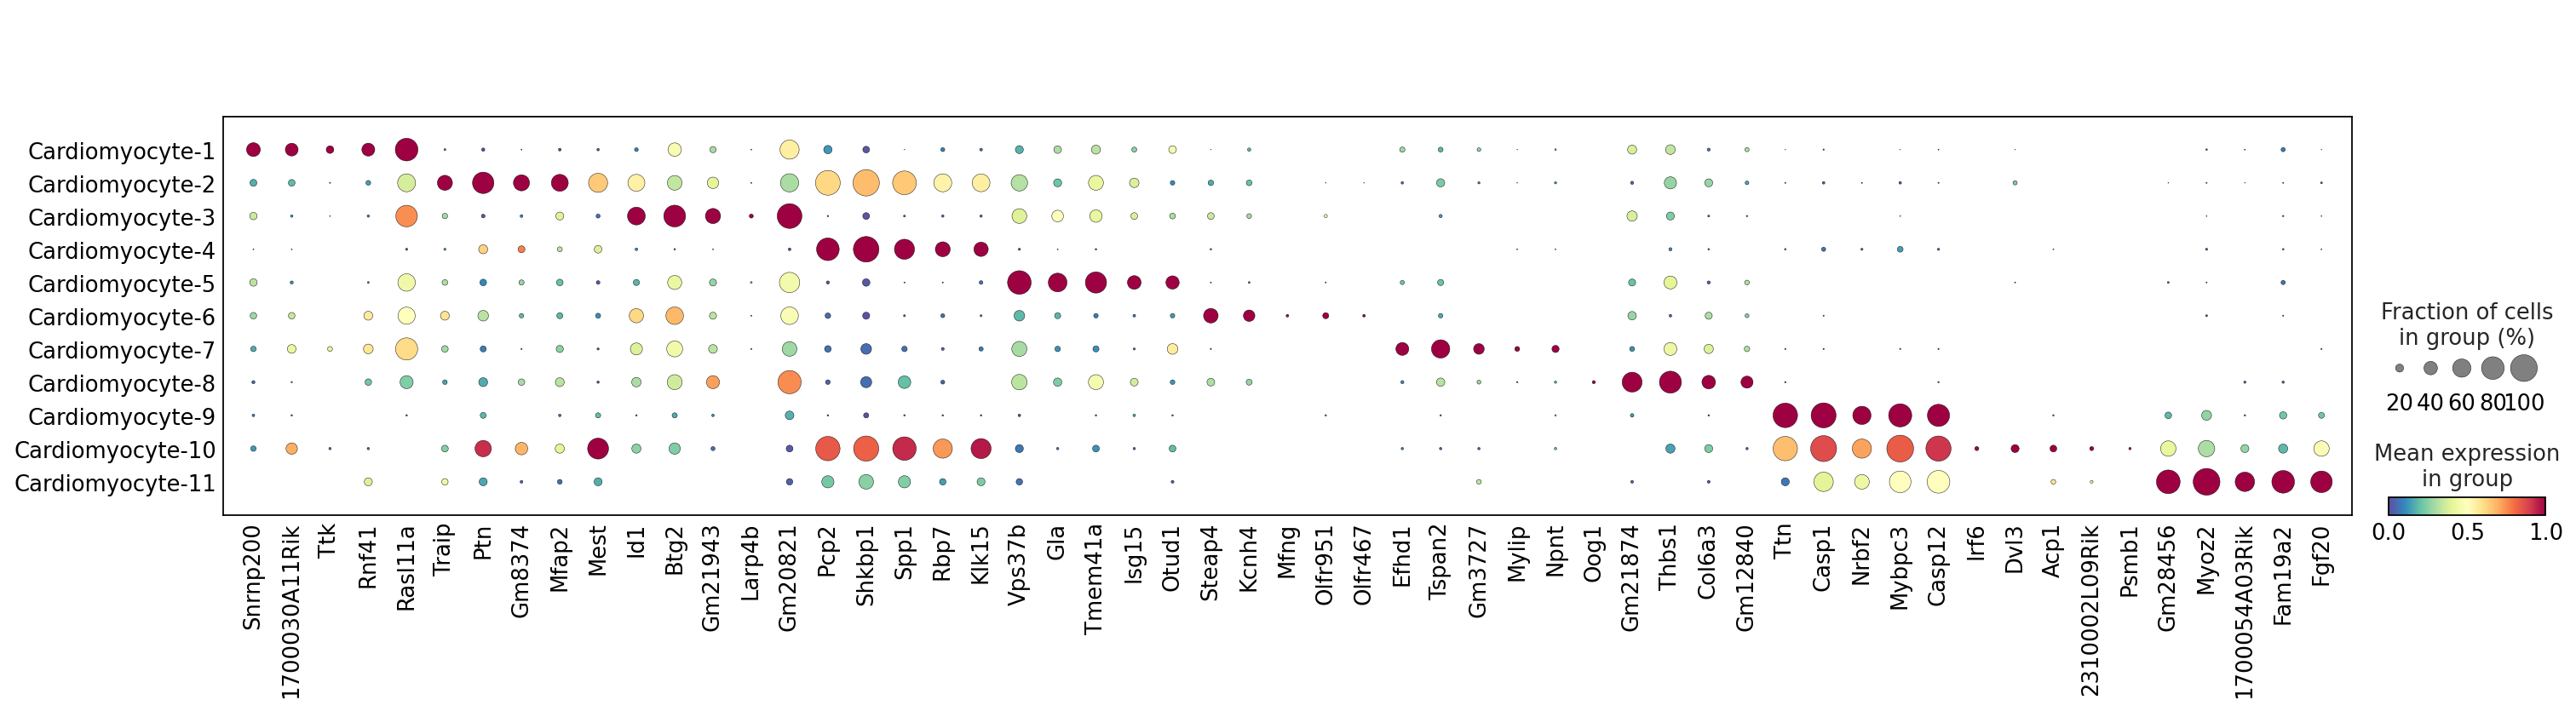

In [127]:
# COSG结果
df_tmp=pd.DataFrame(scRNA_seq_Card.uns['cosg']['names'][:5,]).T
df_tmp.reindex(scRNA_seq_Card.obs['leiden'].cat.categories)
marker_genes_list=np.ravel(df_tmp.reindex(scRNA_seq_Card.obs['leiden'].cat.categories))
sc.pl.dotplot(scRNA_seq_Card, marker_genes_list,
             groupby='leiden',              
             dendrogram=False,
             standard_scale='var',
             cmap='Spectral_r')

# Card dpt_pseudotime

In [128]:
#adata=rna_b_p
sc.tl.diffmap(scRNA_seq_Card)
sc.pp.neighbors(scRNA_seq_Card, n_neighbors=10, use_rep='X_diffmap')

In [130]:
sc.tl.paga(scRNA_seq_Card, groups='leiden')

In [136]:
scRNA_seq_Card.obs['subtype']=scRNA_seq_Card.obs['leiden']

In [140]:
#scRNA_seq_Card.obs['number']=''
new_cluster_names = [
    '0','1','2','3','4','5','6','7','8','9','10']
scRNA_seq_Card.rename_categories('leiden', new_cluster_names)

Omitting cosg/names as old categories do not match.
Omitting cosg/scores as old categories do not match.


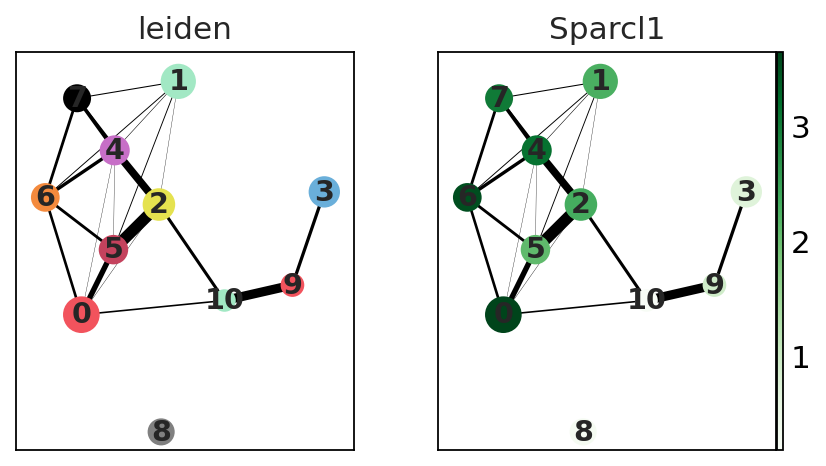

In [157]:
sc.pl.paga(scRNA_seq_Card, color=['leiden','Sparcl1'],cmap='Greens')

In [158]:
sc.tl.draw_graph(scRNA_seq_Card, init_pos='paga')

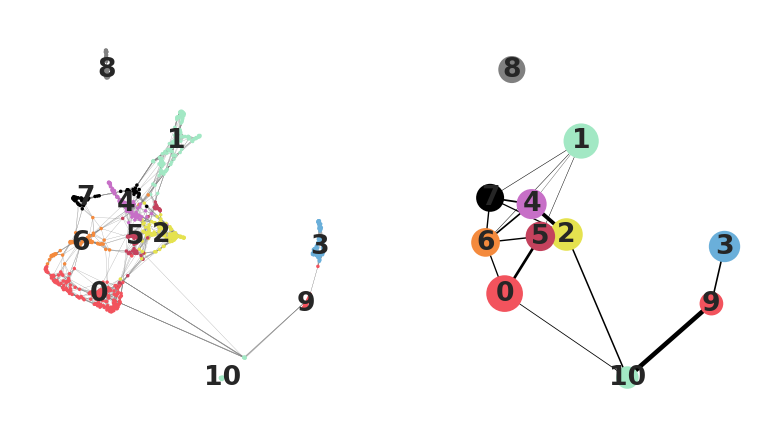

In [159]:
sc.pl.paga_compare(
    scRNA_seq_Card, threshold=0.03, title='', right_margin=0.2, size=10, edge_width_scale=0.5,
    legend_fontsize=12, fontsize=12, frameon=False, edges=True, save=True)

In [167]:
scRNA_seq_Card.uns['iroot'] = np.flatnonzero(scRNA_seq_Card.obs['leiden']  == '7')[0]

In [168]:
sc.tl.dpt(scRNA_seq_Card)

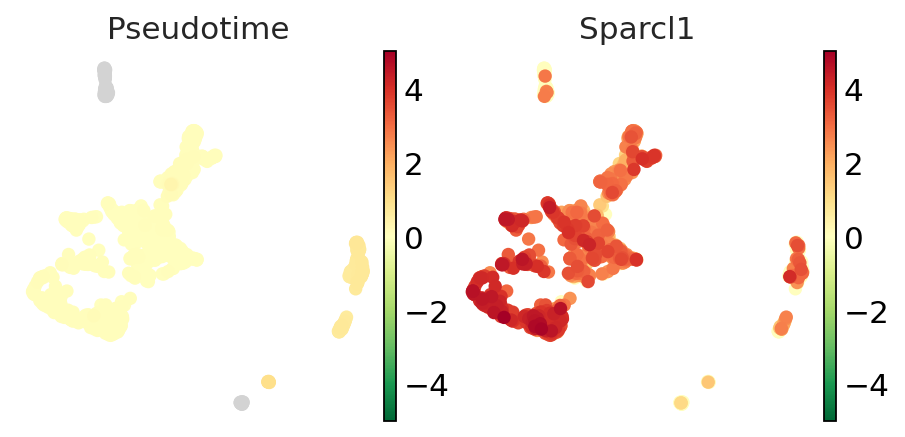

In [169]:
sc.settings.set_figure_params(dpi=80,figsize=[3,3])
sc.pl.draw_graph(scRNA_seq_Card, color=['dpt_pseudotime','Sparcl1'],wspace=0.1,cmap='RdYlGn_r'
          ,add_outline=False,frameon=False,save='_fig_rna_pos.png',
          title=['Pseudotime','Sparcl1'],
          vmin=-5,vmax=5)